#1 Install and Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the cleaned data
df = pd.read_csv('../data/cleaned_heart_disease.csv')

print("Cleaned data loaded successfully.")
df.head()

Cleaned data loaded successfully.


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,exang_1.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,True,True,False,False,False,False,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,True,True,False,False,False,True,False,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#2 Separate Features and Target

In [4]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (303, 22)
Target shape: (303,)


#3 Apply PCA

In [5]:
# Initialize PCA
# By not setting n_components, it will be set to the number of features
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X)

#4 Determine the optimal number of Compnents

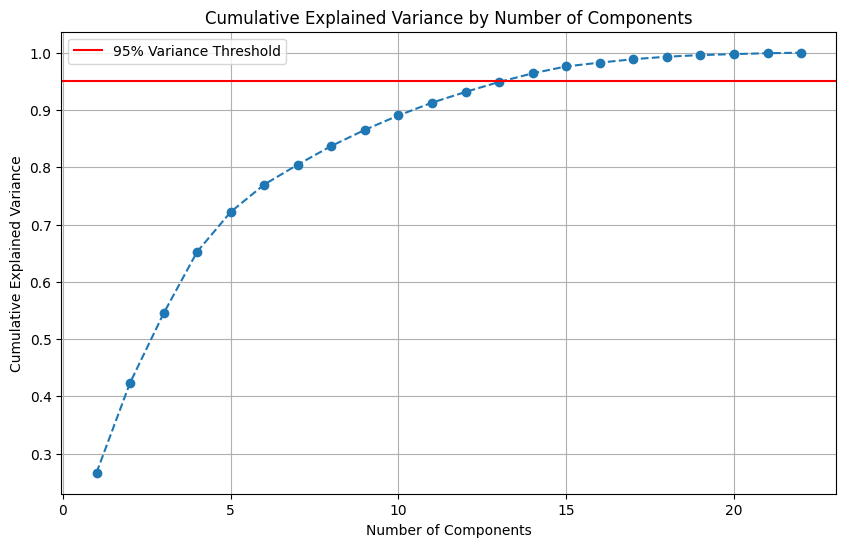

In [6]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend()
plt.show()

#5 Vizualize PCA results

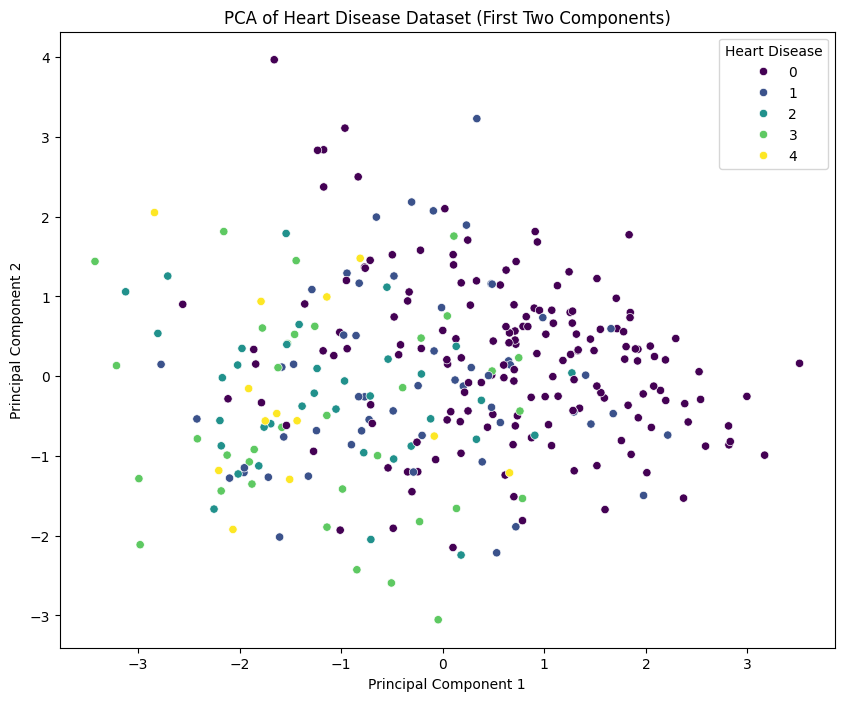

In [7]:
# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y.values

# Plot the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC_1', y='PC_2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Heart Disease Dataset (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.show()